In [23]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd

In [180]:
consumerKey = 'SV8UUKCsWGbHB0fBG9xEWdDDl'
consumerSecret = 'gu7fZc75qzoZ20Cf1Y4FDSBGiX40H5L5dlMhmVqFecMZzUzBuo'
accessToken = '1074255938-ea90Lx6fUeZ6MW780cHpmmozr4XDmC47VH4cKpM'
accessTokenSecret = 'Npsz59fFPutq2aCbdfO6l0ylYjHZAgZxkojUoWHV8gsIh'


In [181]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [182]:
searchTweet = input("Enter something")
NoOfTweets = int(input("Enter number of tweets"))

ENter your brand davido
Enter nummber of tweets 200


In [209]:

tweets = tweepy.Cursor(api.search, q=searchTweet).items(NoOfTweets)
data=[]

In [210]:
import nltk
from nltk.tokenize import word_tokenize, TweetTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
import re
from nltk.corpus import stopwords

In [211]:

bucket = []
cleans = []
for tweet in tweets:
    if tweet.lang == 'en':
        t_tweet = tweet.text
        clean_text = ' '.join(re.sub("(@[A-Za-z0-9_]+)|(http[:/.A-Za-z0-9]+)|(RT)|(#[A-Za-z0-9_]+)|(\W)", " ", t_tweet).split())
        token = sent_tokenize(clean_text)
        root_text = [lemma.lemmatize(text) for text in token if text not in stopwords.words('english')]
        bucket.append(root_text)

# print(bucket)

In [241]:
from textblob import TextBlob
data = []
for text in bucket:
    for each_word in text:
        analysis = TextBlob(each_word)
        if analysis.sentiment.polarity < 0:
            polarity = 'Negative'
            
        else:
            polarity = 'Positive'
            
        save = {}
        save['Sentiment'] = polarity
        save['Tweet'] = each_word
        data.append(save)



In [242]:
df = pd.DataFrame(data)
df.to_csv('davido.csv', index=False)

In [243]:
data = pd.read_csv('davido.csv')
data.head(10)

,Sentiment,Tweet
0,Negative,I hope I m not too late please bless me
1,Positive,Check mine too please
2,Positive,I must be the 15th person
3,Positive,show dem Dm me pls son of mercy
4,Positive,Make me The One
5,Positive,I hope you see this
6,Positive,This is one of my side hustle I grind when I m...
7,Negative,Yinmu not fair Same girls wey dey yab chioma N...
8,Positive,Omo Baba olowo for the world
9,Positive,I m waiting for To Retweet and DM me


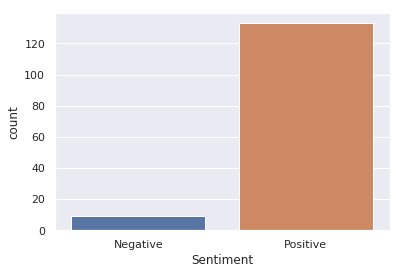

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')
sns.countplot(x = data['Sentiment'])
plt.savefig('plot.jpg')
plt.show()
